In [10]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import seaborn as sns
from matplotlib import colormaps
from result import *
from adjustText import adjust_text

def load_pkl(path):
    with open(path, 'rb') as file:
        loaded_dict = pickle.load(file)
    return loaded_dict

FILTERING_S_ALG = ['SD_LONGEST', 'SD_EARLIEST', 'SD_RANDOM','SD_OUR']
FILTERING_C_ALG = ['C_EARLIEST', 'C_RANDOM', 'C_OUR']
FILTERING_UE_ALG = ['SS_LONGEST', 'SS_RANDOM','SS_OUR']
FILTERING_ACCESS_OPPORTUNITIES_ALG = ['56', 'x8', 'x12']
FILTER_MAX_AND_MIN = True
FILTER_PERCENT = 1


directory_path = './'
result = {}

def translate_label(source_alg, candidate_alg, ue_alg):
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_RANDOM':
        return 'A'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_EARLIEST':
        return 'B'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_LONGEST':
        return 'C'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_RANDOM':
        return 'D'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_EARLIEST':
        return 'E'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_LONGEST':
        return 'F'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_RANDOM':
        return 'G'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_EARLIEST':
        return 'H'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_LONGEST':
        return 'I'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_RANDOM':
        return 'J'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_EARLIEST':
        return 'K'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_LONGEST':
        return 'L'
    if ue_alg == 'SS_OUR' and candidate_alg == 'C_OUR' and source_alg == 'SD_OUR':
        return 'L\nC\nH'
    

# Loop through the files in the directory
for filename in os.listdir(directory_path):
    # Check if the file ends with .pkl
    if filename.endswith('.pkl'):
        print(filename)
        source_alg = filename[:-4].split('|')[0]
        candidate_alg = filename[:-4].split('|')[1]
        ue_alg = filename[:-4].split('|')[2]
        access_opportunities = filename[:-4].split('|')[3]
        if (source_alg in FILTERING_S_ALG
        and candidate_alg in FILTERING_C_ALG
        and ue_alg in FILTERING_UE_ALG
        and access_opportunities in FILTERING_ACCESS_OPPORTUNITIES_ALG):
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)] = load_pkl(filename)
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['time_sat_matrix'] = np.array(result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['time_sat_matrix'])[:, 6500:20000]
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['paper_label'] = translate_label(source_alg, candidate_alg, ue_alg)

result = prepare_result(result, FILTER_MAX_AND_MIN, FILTER_PERCENT)

SD_LONGEST|C_RANDOM|SS_RANDOM|56.pkl
SD_RANDOM|C_EARLIEST|SS_RANDOM|56.pkl
SD_LONGEST|C_EARLIEST|SS_LONGEST|56.pkl
SD_LONGEST|C_EARLIEST|SS_RANDOM|56.pkl
SD_EARLIEST|C_EARLIEST|SS_RANDOM|56.pkl
SD_EARLIEST|C_RANDOM|SS_LONGEST|56.pkl
SD_RANDOM|C_EARLIEST|SS_LONGEST|56.pkl
SD_RANDOM|C_RANDOM|SS_LONGEST|56.pkl
SD_EARLIEST|C_EARLIEST|SS_LONGEST|56.pkl
SD_RANDOM|C_RANDOM|SS_RANDOM|56.pkl
SD_EARLIEST|C_RANDOM|SS_RANDOM|56.pkl
SD_LONGEST|C_RANDOM|SS_LONGEST|56.pkl
C Maximum signalling value: 5 at index [(8, 788), (8, 1378), (8, 1980), (10, 286), (10, 1047), (10, 1081), (11, 1542), (11, 1546), (11, 1650), (11, 1659), (11, 2131), (11, 2136), (11, 2486), (12, 2009), (12, 2828), (13, 273), (13, 734), (13, 883), (13, 1518), (14, 4118), (14, 4218), (15, 3010), (16, 3709), (16, 4170), (16, 4206), (16, 4461), (16, 4470), (17, 4969), (17, 5045), (17, 5554), (17, 5837), (17, 5864), (17, 5876), (17, 6261), (18, 4841), (18, 4845), (18, 5209), (18, 5244), (18, 5595), (20, 7538), (20, 7652), (20, 8037), (2

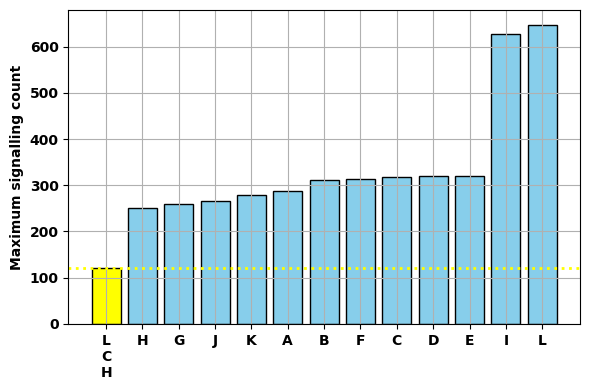

The total signalling: the lower, the better


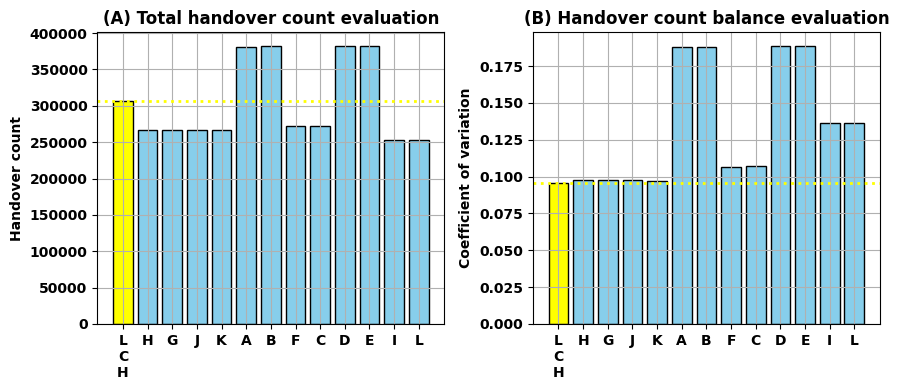

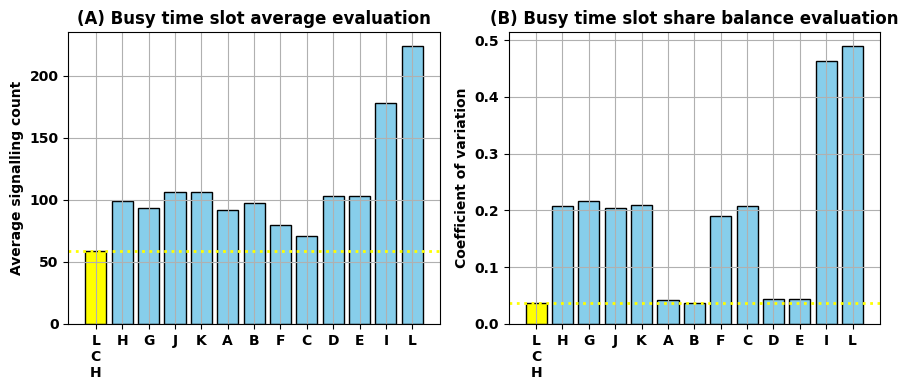

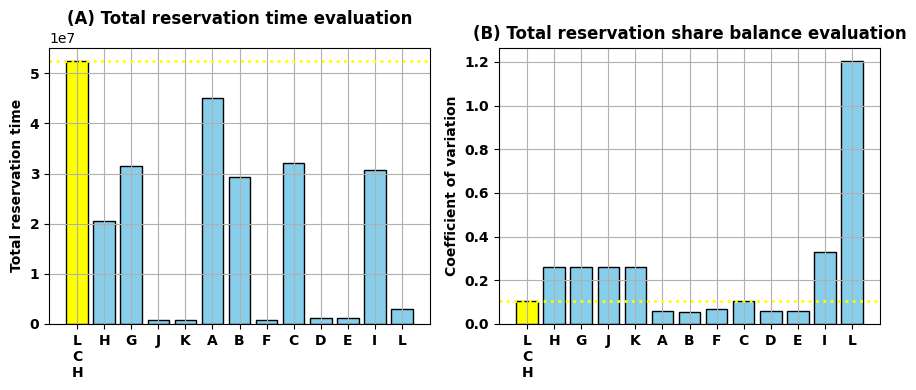

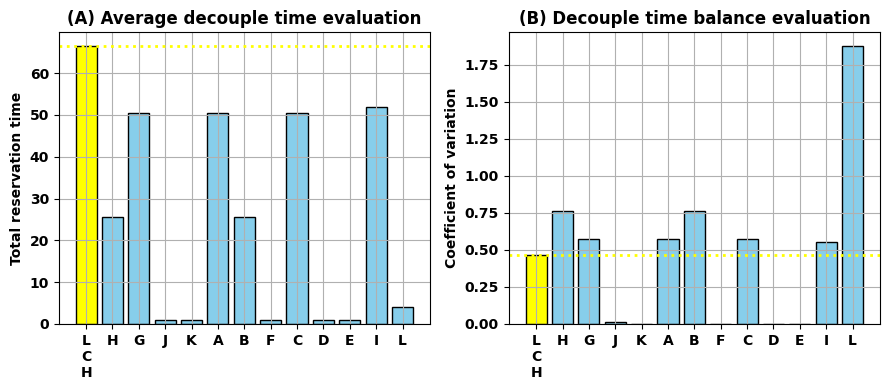

In [5]:
draw_prepared_result(result)

In [3]:
# # The figure describes the maximum signalling of each satellite
# draw_max_signalling(result)
# draw_cumulative_load_each_time(result)
# draw_total_load_each_satellite(result)
# draw_busy_hour_distribution(result)
# draw_max_reservation(result)
# draw_heatmap(result, 100)

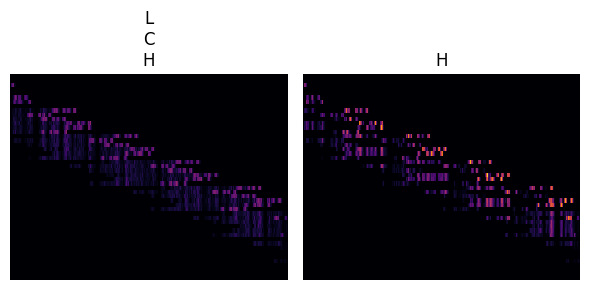

In [15]:
draw_heatmap(result, 1, "inferno")

In [22]:
count = 0
UE_list = result[('SD_RANDOM',
  'C_RANDOM',
  'SS_RANDOM',
  '56')]['ue_delay_history']
total_UE = len(UE_list)
for arr in UE_list:
    total_UE = len(UE_list)
    count += len(arr)
print(count / total_UE)

5.43694


In [ ]:
def side_effect_compute_UE_average_handover(result):
    total_access = []
    UE_access_list = result['ue_delay_history']
    count = 0
    total_UE = len(UE_access_list)
    for list in UE_access_list:
        count += len(list)
    average = count / total_UE
    return average

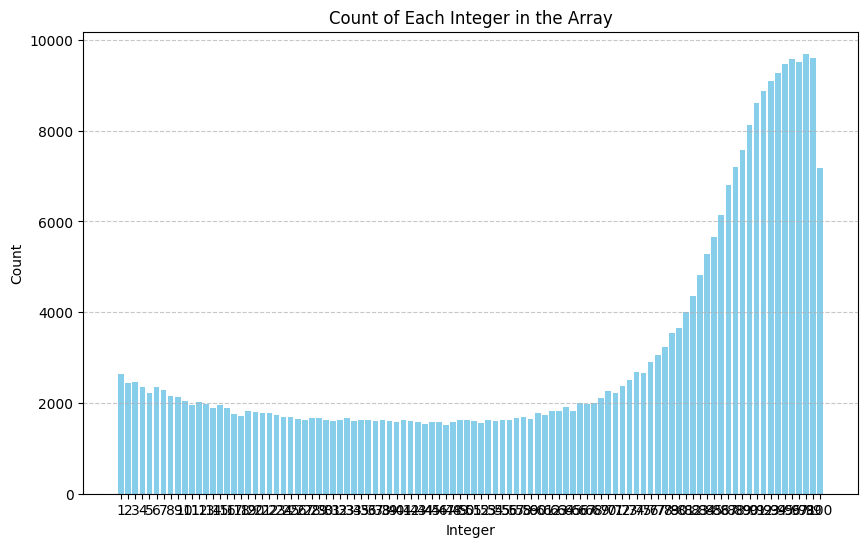

In [3]:
import matplotlib.pyplot as plt
from collections import Counter
 
arr = []
for a in result[('SD_OUR',
  'C_OUR',
  'SS_OUR',
  '56')]['ue_delay_history']:
    arr += a
counter = Counter(arr)
 
# Extracting the integers and their counts
integers = list(counter.keys())
counts = list(counter.values())
 
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(integers, counts, color='skyblue')
plt.xlabel('Integer')
plt.ylabel('Count')
plt.title('Count of Each Integer in the Array')
plt.xticks(integers)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
result[('SD_OUR',
  'C_OUR',
  'SS_OUR',
  '56')]

{'time_sat_matrix': array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 6, 12, 14, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]]),
 'total_handover': 284150,
 'max_delays': [100,
  0,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  0,
  0,
  100,
  0,
  0,
  0,
  0],
 'reservation_count': [210593,
  0,
  989053,
  471853,
  701201,
  1215398,
  1109180,
  734974,
  1394736,
  1439726,
  1365875,
  1650528,
  1513309,
  1366175,
  1353897,
  1487298,
  1367919,
  1699889,
  1497404,
  1363411,
  1352834,
  1458860,
  1447637,
  1688973,
  1449346,
  1313406,
  1434091,
  1476768,
  1472173,
  1602687,
  1435545,
  1309252,
  1107

In [15]:
measurement = result[('SD_RANDOM',
  'C_RANDOM',
  'SS_RANDOM',
  '56')]['measurement_timeslot']

In [16]:
access = result[('SD_RANDOM',
  'C_RANDOM',
  'SS_RANDOM',
  '56')]['access_timeslot']

In [17]:
measurement[0]

[4171, 4548, 7405, 9960, 11207, 13874, 15475, 18898]

In [18]:
access[0]

[4172, 4556, 7485, 10042, 11292, 13955, 15571, 18921]

In [21]:
total_serving_time = []
for (u_measurement_list, u_access_list) in zip(measurement, access):
    print((u_measurement_list, u_access_list))

([4171, 4548, 7405, 9960, 11207, 13874, 15475, 18898], [4172, 4556, 7485, 10042, 11292, 13955, 15571, 18921])
([2332, 5177, 8801, 8942, 12364, 14486, 17083], [2353, 5199, 8860, 9005, 12456, 14542, 17180])
([2738, 4124, 7378, 11739, 13275, 17815, 19743], [2794, 4201, 7461, 11789, 13360, 17823, 19833])
([3364, 5491, 6786, 10209, 13632, 17202, 19182], [3375, 5522, 6842, 10229, 13692, 17286, 19190])
([4143, 5275, 6785, 10019, 14412, 16488, 17357], [4154, 5326, 6857, 10111, 14478, 16570, 17428])
([1642, 3454, 6784, 7212, 10446, 15004, 16915, 17494], [1681, 3532, 6842, 7289, 10490, 15055, 16929, 17540])
([713, 3515, 3947, 4722, 6675, 10174, 10731, 14892, 17659, 18315], [750, 3537, 4037, 4760, 6697, 10243, 10748, 14989, 17708, 18390])
([3264, 5212, 8647, 9923, 11193, 12057, 16583], [3306, 5289, 8654, 9934, 11195, 12077, 16632])
([2648, 4158, 5977, 6697, 7296, 8475, 9932, 10626, 14426, 18178, 19635], [2747, 4246, 6050, 6766, 7319, 8554, 9969, 10725, 14481, 18204, 19719])
([3489, 3930, 7388, 80